# İçimi DEMİRAĞ
## 191180033
### Assignment 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_titanic = pd.read_csv('train.csv') #reads the data
df_titanic.info() #shows information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Question 1

In [3]:
df_titanic[:6] #shows the first 6 data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


# Question 2

In [4]:
df_titanic.columns #shows the column titles

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Question 3

In [5]:
df_titanic["PassengerId"].shape #shows the passengers size of the dataset

(891,)

# Question 4

In [6]:
df_titanic["Age"].isnull().sum() #shows the number of NaN values of the age column

177

In [7]:
df_titanic["Cabin"].isnull().sum() #shows the number of NaN values of the cabin column

687

In [8]:
df_titanic["Embarked"].isnull().sum() #shows the number of NaN values of the embarked column

2

Age column has 177 NaN values, cabin column has 687 NaN values, embarked column has 2 NaN values.

# Question 5

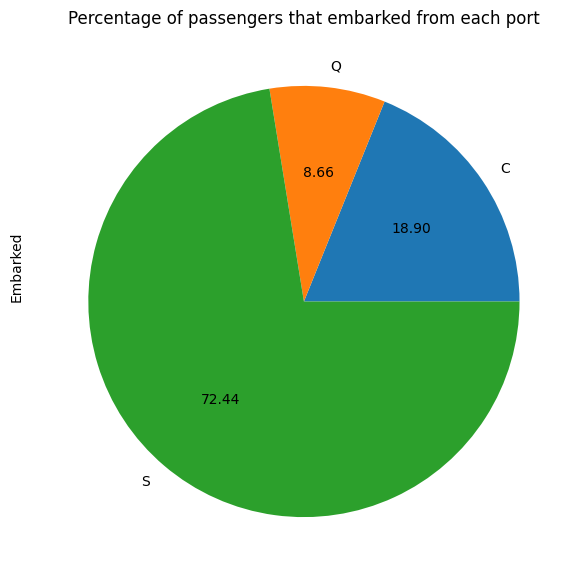

In [9]:
df_titanic2= df_titanic.dropna(subset=["Embarked"]) #drops the rows with NaN values in the embarked column

df_titanic2.groupby("Embarked").size().plot(kind="pie", fontsize=10, autopct="%.2f", figsize=(15, 7)) #shows the number of passengers in each embarked port
plt.ylabel("Embarked", horizontalalignment="left") #sets the y label
plt.title("Percentage of passengers that embarked from each port") #sets the title
plt.show() #shows the plot

Southampton port had the most number of people embarked from. Queenstown port had the least amount of people embarked from.

# Question 6

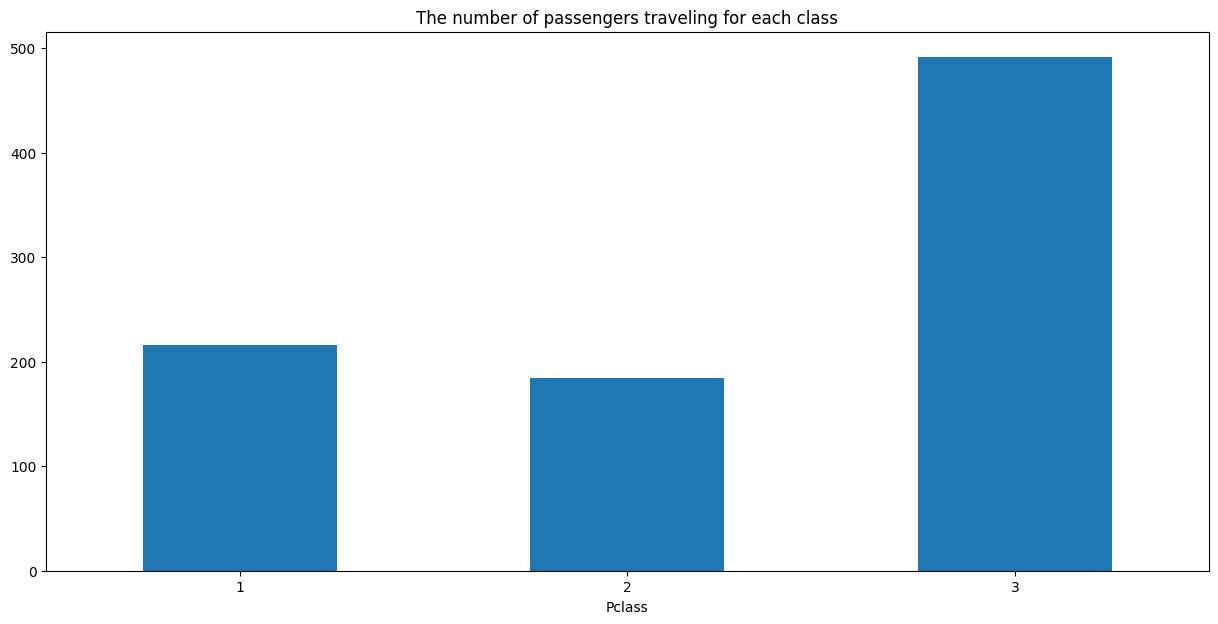

In [10]:
df_titanic.groupby("Pclass").size().plot(kind="bar", rot=0, figsize=(15, 7)) #shows the number of passengers in each class
plt.title("The number of passengers traveling for each class") #sets the title
plt.show() #shows the plot

3rd class had the most number of passengers.

# Question 7

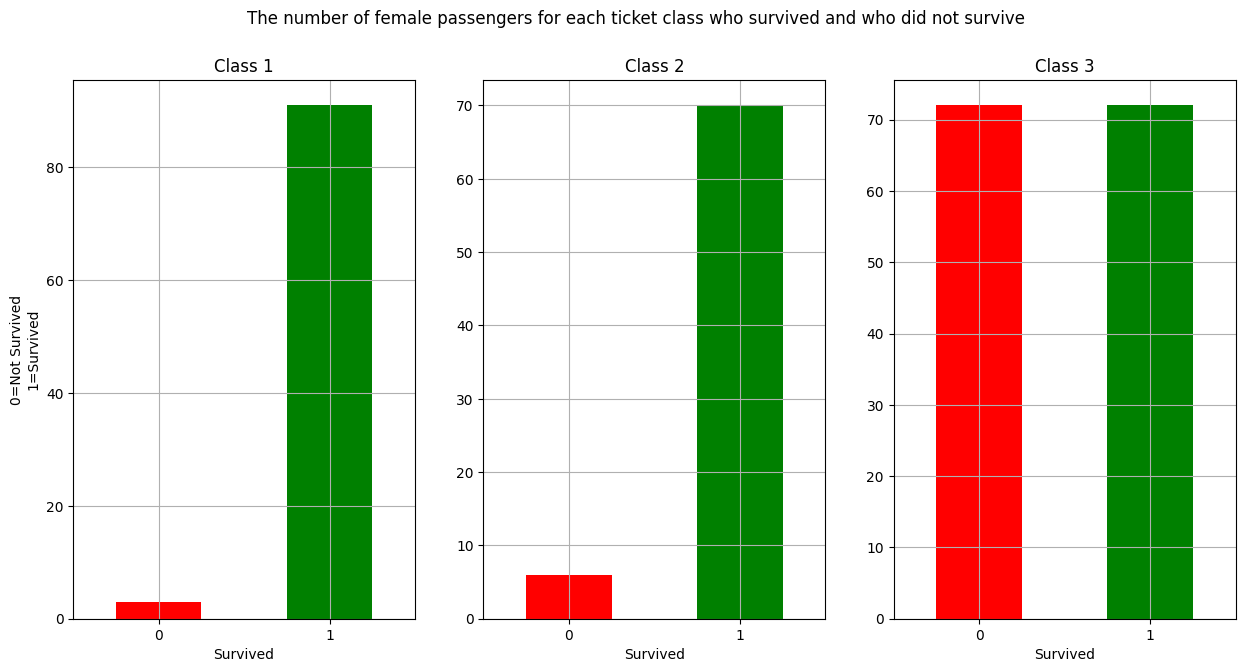

In [11]:
plt.figure(figsize=(15,7)) #sets the figure size
plt.suptitle("The number of female passengers for each ticket class who survived and who did not survive") #sets the title

plt.subplot(1,3,1)
#shows the number of female passengers for class 1 who survived and who did not survive
df_titanic[(df_titanic["Pclass"]==1) & (df_titanic["Sex"]=="female")].groupby("Survived").size().plot(kind="bar", title="Class 1", ylabel='0=Not Survived\n1=Survived', color=["red","green"], rot=0)
plt.grid() #shows the grid

plt.subplot(1,3,2)
#shows the number of female passengers for class 2 who survived and who did not survive
df_titanic[(df_titanic["Pclass"]==2) & (df_titanic["Sex"]=="female")].groupby("Survived").size().plot(kind="bar", title="Class 2", color=["red","green"], rot=0)
plt.grid() #shows the grid

plt.subplot(1,3,3)
#shows the number of female passengers for class 3 who survived and who did not survive
df_titanic[(df_titanic["Pclass"]==3) & (df_titanic["Sex"]=="female")].groupby("Survived").size().plot(kind="bar", title="Class 3", color=["red","green"], rot=0)
plt.grid() #shows the grid


# Question 8

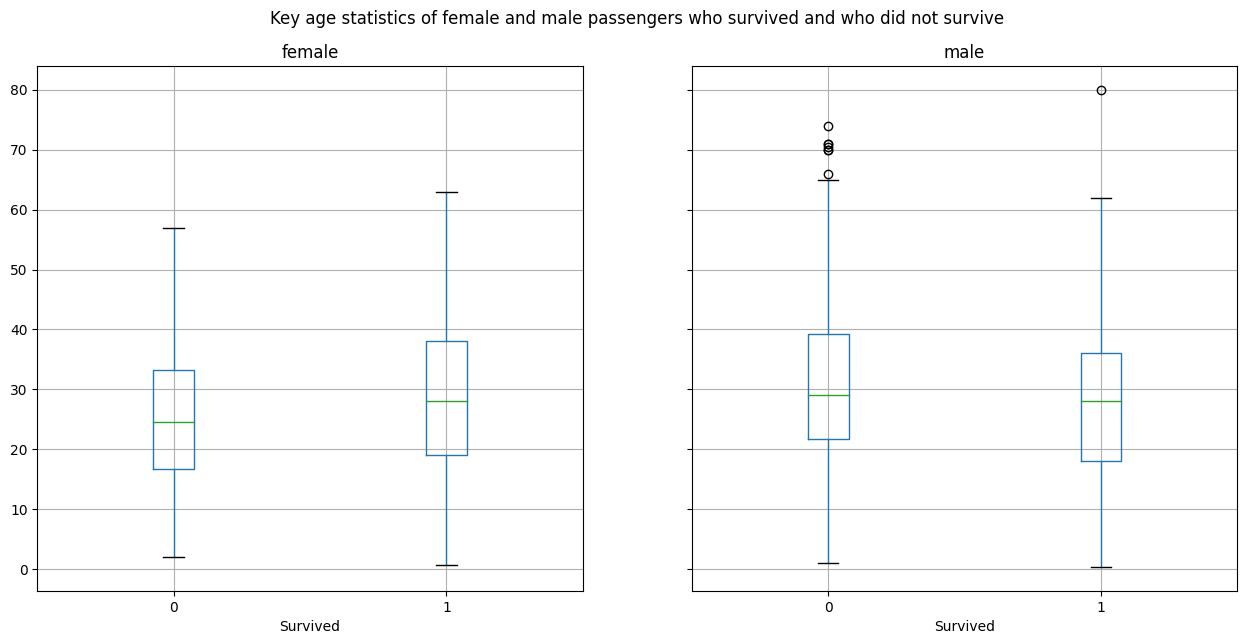

In [12]:
df_titanic2 = df_titanic.dropna(subset=["Age"]) #drops the rows with NaN values in the age column

df_titanic2.groupby("Sex").boxplot(by ='Survived', column ='Age', grid = True, figsize=(15, 7)) #shows the boxplot of the age of the passengers who survived and who did not survive
plt.suptitle("Key age statistics of female and male passengers who survived and who did not survive") #sets the title
plt.show() #shows the plot

# Question 9 - 10

In [13]:
pd.crosstab(df_titanic['Sex'], df_titanic['Survived'], margins=True) #shows how many people for each gender have survived

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Looking at column 1, it is seen that the survival rate of women was higher. This might be because priority is given to females and children.

# Question 11

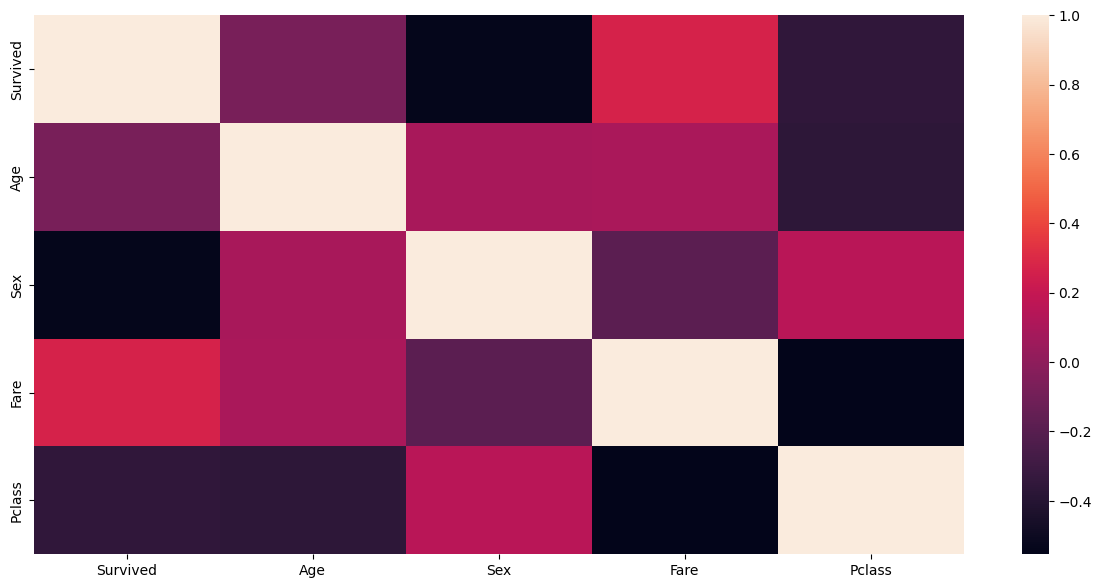

In [14]:
df_titanic3 = pd.DataFrame(df_titanic2, columns = ["Survived", "Age", "Sex", "Fare", "Pclass"]) #creates a new dataframe with desired attributes

#Since the heatmap ignores values other than numeric values, we need to label encoding the Sex column which is of type object.
from sklearn.preprocessing import LabelEncoder
df_titanic3["Sex"] = LabelEncoder().fit_transform(df_titanic3["Sex"])

fig, ax = plt.subplots(figsize=(15, 7)) #sets the figure size
sns.heatmap(df_titanic3.corr()) #shows the heatmap of the correlation between the attributes
plt.show() #shows the plot

# Question 12

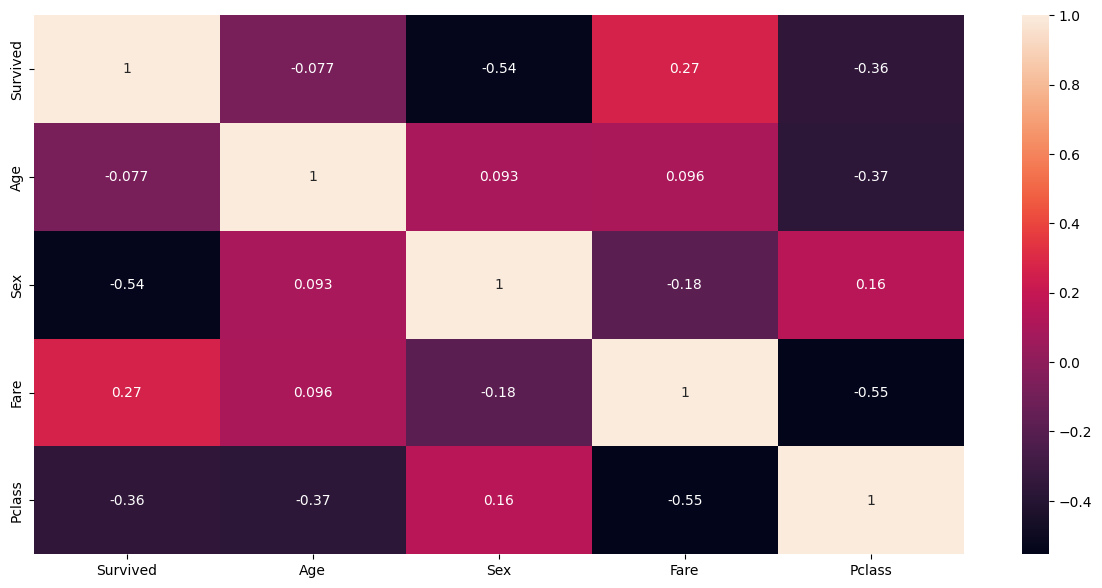

In [15]:
fig, ax = plt.subplots(figsize=(15, 7)) #sets the figure size
sns.heatmap(df_titanic3.corr(), annot=True) #shows the heatmap of the correlation between the attributes with the “Pearson” standard correlation coefficient values
plt.show() #shows the plot

When we look at the correlation coefficient for the relationship between survival and ticket class, we see a negative correlation, so there is an inverse relationship between the two variables, that is, as one variable increases, the other decreases. That means that if you traveled in 3rd class you were less likely to survive than if you traveled in 2nd class and similarly, if you traveled in 2nd class you were less likely to survive than if you traveled in 1st class.

# Question 13

In [16]:
df_titanic2["Age"].min() #shows the age of the youngest passenger

0.42

# Question 14

In [17]:
df_titanic2["Fare"].mean() #shows the average fare

34.694514005602244

# Question 15

In [18]:
df_titanic2["Age"].where(df_titanic2["Survived"] == 1).max() #shows the age of the oldest passenger who survived

80.0

# Question 16

In [19]:
df_titanic2["Age"].where((df_titanic2["Survived"] == 1) & (df_titanic2["Sex"] == "female")).max() #shows the age of the oldest female passenger who survived

63.0

# Question 17

In [20]:
df_titanic2[(df_titanic2["Age"] < 10) & (df_titanic2["Parch"]==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,NaN,S


There was a children under the age of 10 traveling without their parents. This may be because there might be a mistake in the data.

# Question 18

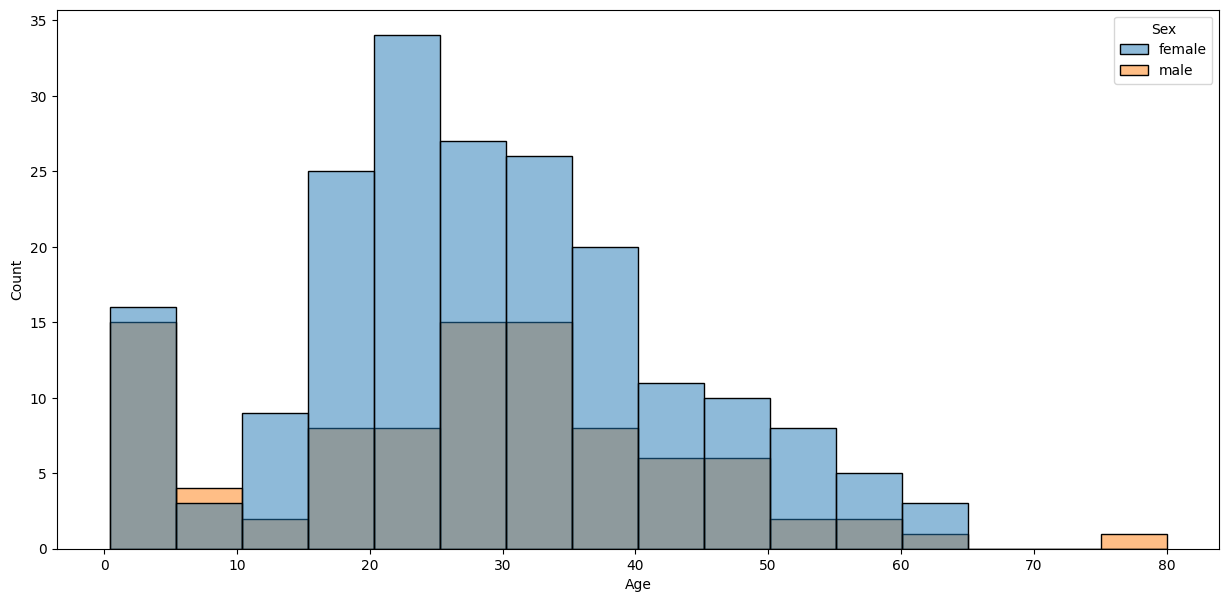

In [21]:
fig, ax = plt.subplots(figsize=(15, 7)) #sets the figure size
sns.histplot(data=df_titanic2.loc[df_titanic2["Survived"]==1], x="Age", hue="Sex") #shows the histogram of the age of the female and male passengers who survived
plt.show() #shows the plot

Female gender had a higher survival chance by looking at these histograms.

# Question 19

In [22]:
df_titanic["SibSp"].max() #shows the number of siblings of the passenger who has the highest number of siblings

8

# Question 20

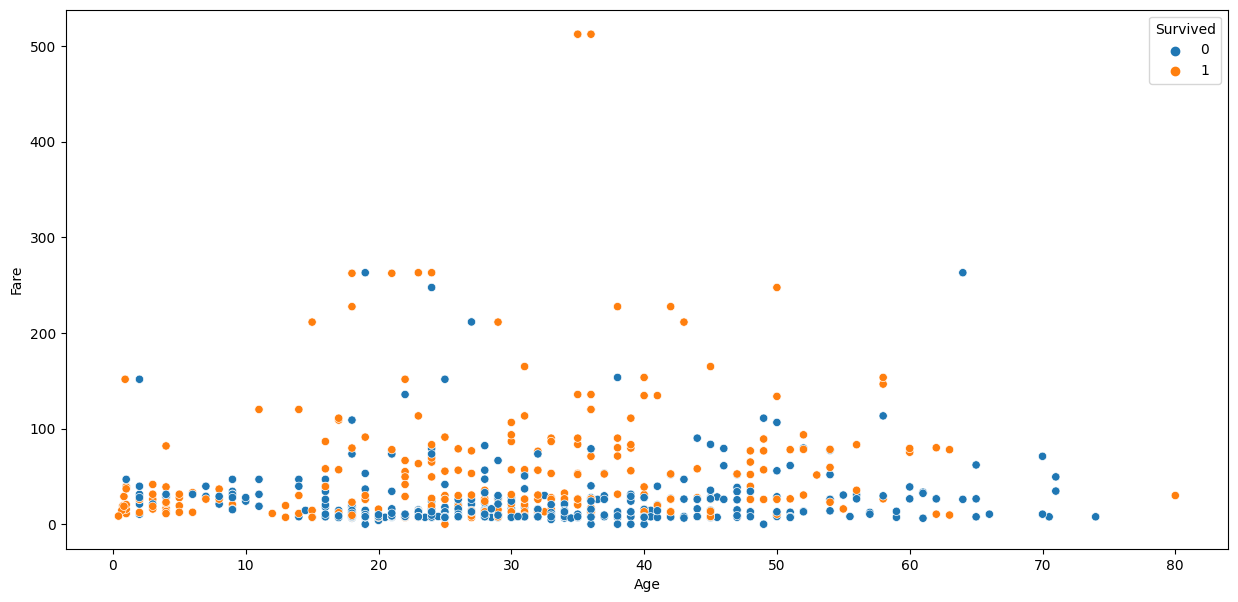

In [23]:
fig, ax = plt.subplots(figsize=(15, 7)) #sets the figure size
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df_titanic2, legend="full", ax=ax) #shows the scatter plot of the age–fare correlation for passengers who survived and who did not survive
plt.show() #shows the plot